Actividad 8.1

In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv("datasets/antropometria-dataset.csv")

df.head(2)

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.70,2,146.4,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.65,2,145.1,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101


In [2]:
df.columns

Index(['folio', 'intp', 'entidad', 'desc_ent', 'sexo', 'edad', 'meses', 'peso',
       'ropa', 'talla', 'emb', 'temb', 'cintura', 'cadera', 'sistol',
       'diastol', 'hpresion', 'tbrazo', 'htension', 'PrimaryLast', 'code_upm',
       'est_dis', 'est_urb', 'est_marg', 'pondef', 'est_var'],
      dtype='object')

In [3]:
X=df["cintura"].values
Y=df["peso"].values

vars=['folio', 'intp', 'entidad', 'desc_ent', 'sexo', 'edad', 'meses', 'peso',
       'ropa', 'talla', 'emb', 'temb', 'cintura', 'cadera', 'sistol',
       'diastol', 'hpresion', 'tbrazo', 'htension', 'PrimaryLast', 'code_upm',
       'est_dis', 'est_urb', 'est_marg', 'pondef', 'est_var']
vars

In [4]:
import statsmodels.api as sm

model=sm.OLS.from_formula("Y~X", #y=b0+b1*x
                         data=df)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                 3.028e+04
Date:                Tue, 07 Sep 2021   Prob (F-statistic):               0.00
Time:                        00:25:06   Log-Likelihood:                -68622.
No. Observations:               18032   AIC:                         1.372e+05
Df Residuals:                   18030   BIC:                         1.373e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.3137      0.427    -19.458      0.000      -9.151      -7.476
X              0.8316      0.005    173.999      0.000       0.822       0.841
==============================================================================
Omnibus:                    12737.948   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1022852.813
Skew:                          -2.683   Prob(JB):                         0.00
Kurtosis:                      39.505   Cond. No.                         472.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

La regresión lineal simple que se obtiene de los datos anteriores dando como resutlado: y=-8.3137+0.8316*x

x=variable independiente---cintura y=variable dependiente---peso

Se puede decir que si es una buen regresion lineal, debido a que la r-cuadrada esta cercana a 1. De igual manera, se aceptan los datos por estos la p-value no es mayor a 0.05, por lo cual los valor de b0 y x si son significativos.

In [5]:
c=df[["cintura","peso"]].corr()
c

,cintura,peso
cintura,1.000000,0.791677
peso,0.791677,1.000000


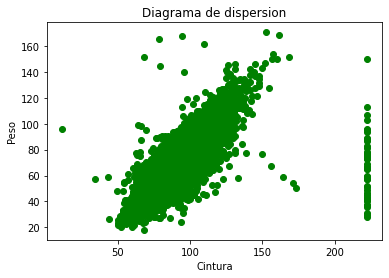

In [6]:
import matplotlib as mlp
import matplotlib.pyplot as plt
plt.scatter(X,Y,c="g")

plt.xlabel("Cintura")
plt.ylabel("Peso")
plt.title("Diagrama de dispersion")

plt.show()

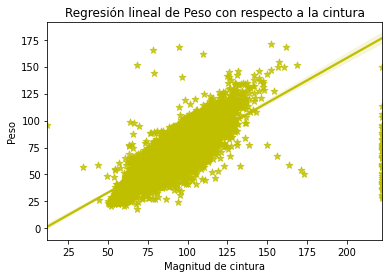

In [9]:
import seaborn as sns
reg_plot= sns.regplot(x="cintura",
                     y="peso",
                     data=df,
                     color="y",
                     marker="*",
                     scatter_kws={"s":50})

reg_plot.set(xlabel="Magnitud de cintura",
      ylabel="Peso")
reg_plot.set_title("Regresión lineal de Peso con respecto a la cintura")
plt.show()

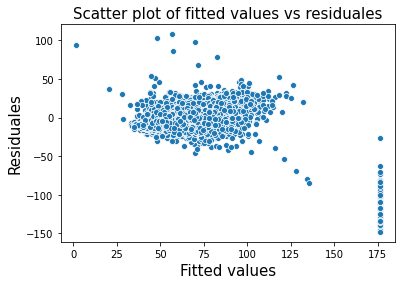

In [10]:
pp=sns.scatterplot(x=result.fittedvalues, #valor ajustado
                  y=result.resid)
pp.set_xlabel("Fitted values",
             size=15)
pp.set_ylabel("Residuales",
             size=15)
pp.set_title("Scatter plot of fitted values vs residuales",
             size=15)
plt.show()

In [8]:
result.resid

0        -0.062068
1        -9.256672
2         6.899685
3        -8.679342
4        12.296515
           ...    
18635     6.777867
18636    -7.979387
18637    -4.268694
18638   -15.751528
18639    -1.620382
Length: 18032, dtype: float64